<div style=" width:100%; height:10px; background:#b7b7b7;"></div>
<table style="width:50%;float:center;padding:100px;">
    <tr style="background-color: rgba(0, 0, 0, 0.0);">
        <td>
            <img src='../img/ifood.png'>
        </td>
    </tr>
</table>
<div style="padding:20px;font-size:20px">
<h1><center>Data Wrangling</center></h1>
</div>

# Database analysis

### Customer understanding

The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled.

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv('../data/ml_project1_data.csv', index_col=0)

In [4]:
print(df.shape)
df.head(2)

(2240, 28)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0


In [5]:
print(len(df.columns))
df.columns

28


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#Reset index from the table
df = df.reset_index()
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# Converting Dt_Customer to date
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
# Check for unique IDs
df['ID'].nunique()

2240

In [11]:
#Looking for null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The *Income* is the only variable with missing values. We know that this information must be a sensitive data for some customers who feel unconfortable to share the real value or even share fake information. **Verify the distribution of this variable and treat data to fix this problem.**

In [12]:
print(df.shape)
df.head(2)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


---

# Data Analysis

As we can see from the describe table there are some missing values for the 'Income' column so let's assume that the missing values are equals to the mean value

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
# Select columns with continous values to see variables distribution
select_cont_columns = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome',  'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

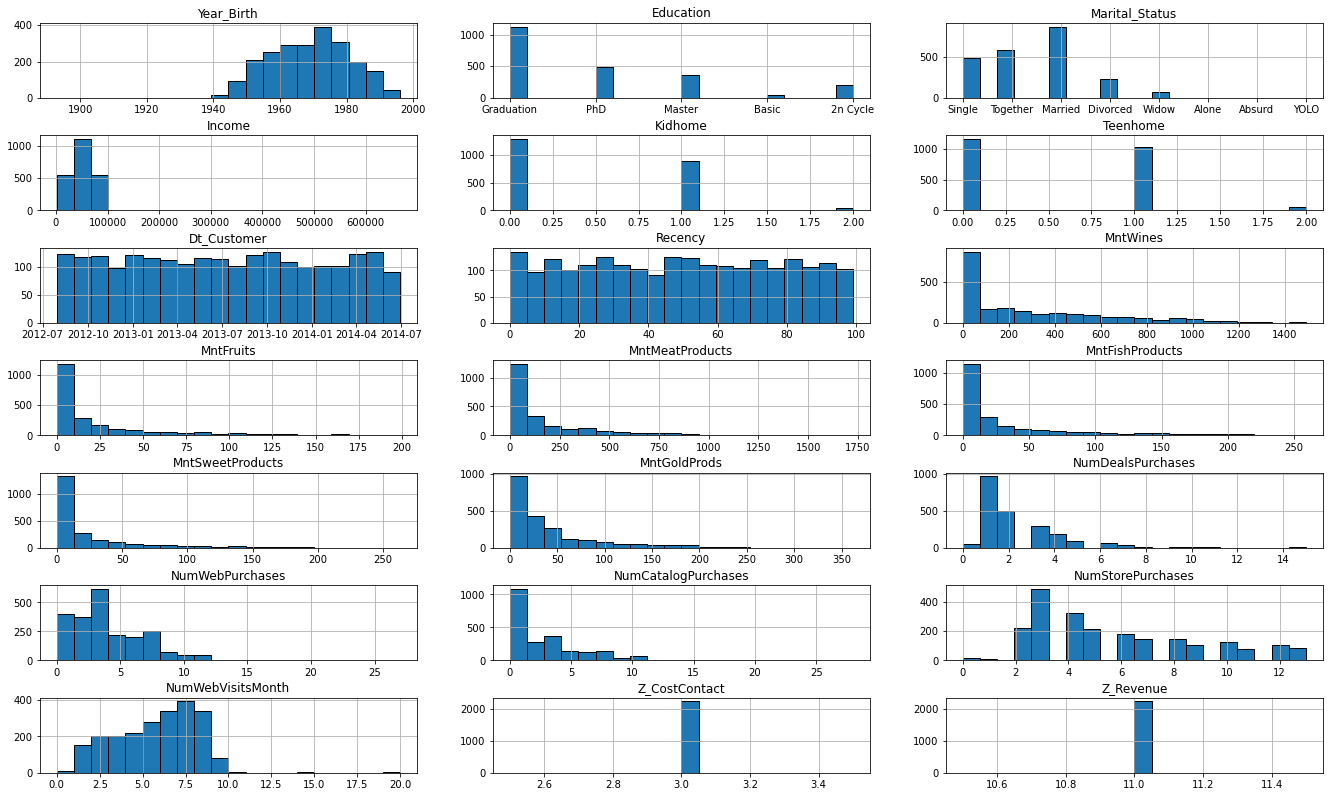

In [15]:
#Histrograms
columns= select_cont_columns
plt.subplots(figsize=(23,20))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Some interesting facts can be notice from those histograms:
- The range of birth years stays between 1940 and before 2000 and that means that the customers age are above 20 years old.**I will check the hypothesis that if the customer age can evaluate the campaign acceptance**
- The customers level of education is high (most customers have graduation).
- Most of the customers are married or live togheter with someone. **I will check the hypothesis that if the marital status can evaluate the campaign acceptance**
- The Income has some outlier, but it is concentrate between zero and 100.000 per year. 
- Most customers don't have kids or teenagers at home.
- The customers enrollment with the company are very well distributed between 2012-07 and 2014-07.
- The recency tells us that the maximum time since the last purchase is less then 100 days. **I will check the hypothesis that if customers who take more time to buy are those who accept the offer from the campaign.**
- The variables related to the spending in products may indicate some preferences of the customers.
- The number of deals purchases are concentrate between zero and two. It's not clear if those purchases refers to a period of time or the total purchases of the customers.
- Customers visit to the website are concentrate between 1 and 10 with some outliers that visit more. 
- Variables *Z_CostContact* and *Z_Revenue* are contants.

In [16]:
# Select columns with categorical values to see how customers responded to each campaign
select_cat_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']

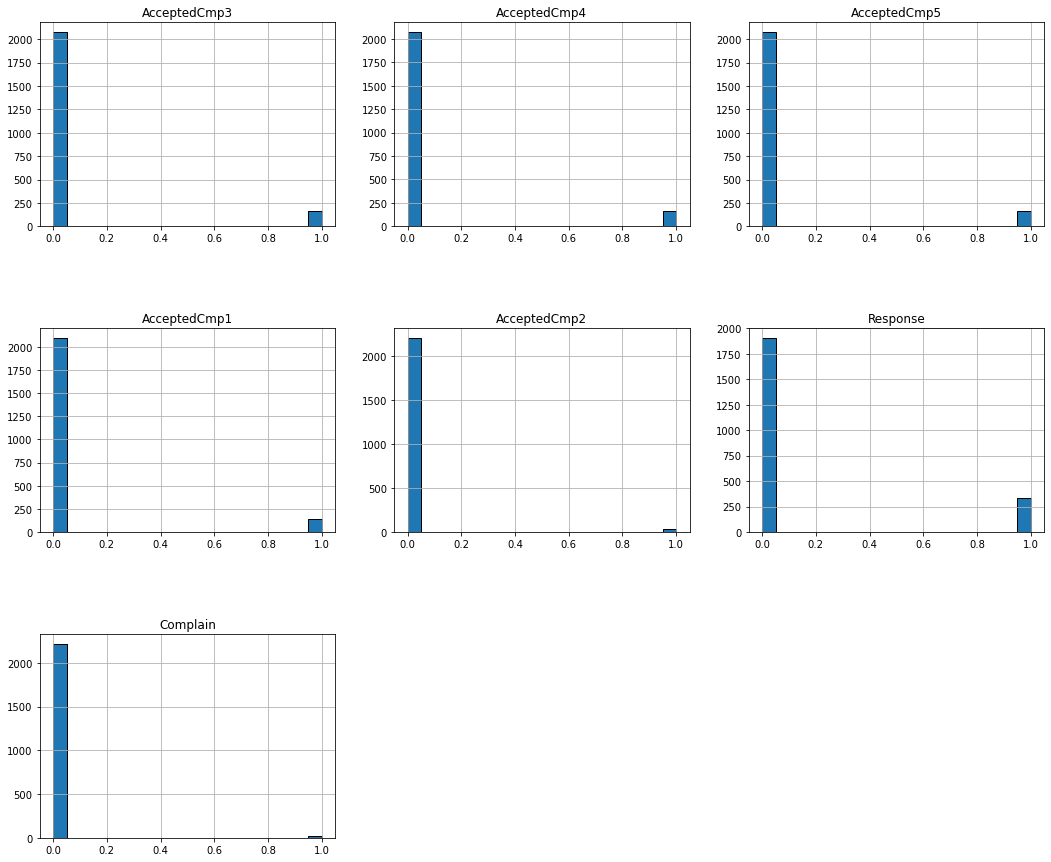

In [17]:
columns= select_cat_columns
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Looking for the variables of the campaign acceptance I an see that:
- The best campaign was the last one, with more customer buying the new gadget. **Verify if there is some comum behavior among the customers who accepted this campaign**
- The campaign with less acceptance was number 2. Unfortunatly there is no much to say about it since I don't know any detail of the campaingn. **Verify if there is some comum behavior among the customer who did not accepted this campaign**
- Campaigns 1,3,4 and 5 had almost the same acceptance.
- Almost all the customer did not have any complains in the lat two years.

----

## Data Treatment

As I showed before, the variable *Income* has some missing values and outliers.

Now I will do some data correction to fix this problem by removing the outliers and replacing it for the average value of the variable.

In [18]:
df_treat = df.copy()

### Missing values

I saw that dasabase has missing value for the variable *Income*. The strategy I will adopt to treat this missing values is to replace them by the mean value of the Income values without the outliers values as showed in this section. 

In [19]:
#Number of missing Income values
df_treat['Income'].isna().sum()

24

In [20]:
# Define interquantile ranges
Q75 = df_treat['Income'].quantile(0.75)
Q25 = df_treat['Income'].quantile(0.25)

iqr_df = Q75 - Q25

income_mean_outliers_off = df_treat[(df_treat['Income'] > Q25  -  1.5*iqr_df) & 
                                      (df_treat['Income'] <= Q75  +  1.5*iqr_df )]['Income'].mean()

In [21]:
# Comparing the Income mean with and without outliers
print(income_mean_outliers_off)
print(df_treat['Income'].mean())

51633.63813405797
52247.25135379061


In [22]:
# Imput average income on missing values
df_treat['Income'].fillna(income_mean_outliers_off, inplace=True)

In [23]:
#Rows with missing values after treatment
df_treat['Income'].isna().sum()

0

### Outliers values

In [24]:
df_treat.shape

(2240, 29)

#### Income

In [25]:
# Define interquantile ranges
Q75 = df_treat['Income'].quantile(0.75)
Q25 = df_treat['Income'].quantile(0.25)

iqr_df = Q75 - Q25

In [26]:
# Identify outliers and check the share in the original dataset

values_quantile = len(df_treat[(df_treat['Income'] > Q25  -  1.5*iqr_df) & 
                                      (df_treat['Income'] <= Q75  +  1.5*iqr_df)])
values_out_quantile = df_treat.shape[0] - values_quantile
print("Number of outliers: ", values_out_quantile)
print("Percent of outliers: ", (values_out_quantile/df_treat.shape[0])*100)

Number of outliers:  8
Percent of outliers:  0.35714285714285715


In [27]:
# Remove outliers
df_treat= df_treat[(df_treat['Income'] > Q25  -  1.5*iqr_df) & 
                                      (df_treat['Income'] <= Q75  +  1.5*iqr_df )]

In [28]:
print(df.shape)
print(df_treat.shape)

(2240, 29)
(2232, 29)


#### Year Birth

In [29]:
# Define interquantile ranges
Q75 = df_treat['Year_Birth'].quantile(0.75)
Q25 = df_treat['Year_Birth'].quantile(0.25)

iqr_df = Q75 - Q25

iqr_df

18.0

In [30]:
# Identify outliers and check the share in the original dataset

values_quantile = len(df_treat[(df_treat['Year_Birth'] > Q25  -  1.5*iqr_df) & 
                                      (df_treat['Year_Birth'] <= Q75  +  1.5*iqr_df)])
values_out_quantile = df_treat.shape[0] - values_quantile
print("Number of outliers: ", values_out_quantile)
print("Percent of outliers: ", (values_out_quantile/df_treat.shape[0])*100)

Number of outliers:  3
Percent of outliers:  0.13440860215053765


In [31]:
# Remove outliers
df_treat = df_treat[(df_treat['Year_Birth'] > Q25  -  1.5*iqr_df) & 
                                      (df_treat['Year_Birth'] <= Q75  +  1.5*iqr_df )]

In [32]:
print(df.shape)
print(df_treat.shape)

(2240, 29)
(2229, 29)


After treating missing and outliers values, the database I will use for the analysis contains 2.229 observations.

---

## Creating new variables

To help me with some insights I will create three new variables:
- Age: customer age based on the customer year of birth
- Acceptance score: 0-6 to say how many offers teh customer accepted being 0 for customer who didn't accept any campaign and 6 to customers who accepted all the six campaigns. 
- Lifetime: time (in years) since customer enrollment with the company.
- TPV: customer total paid value (total spent in products)


#### Age

In [33]:
#Current year
today = datetime.today()

In [34]:
df_treat['Age'] = today.year - df_treat['Year_Birth']

#### Acceptance score

In [35]:
# Function to help checking all rows and retunr the score a the sum of the results
def score_value(camp1, camp2, camp3, camp4, camp5, camp6):
    score = camp1 + camp2 + camp3 + camp4 + camp5 + camp6
    return np.round(score,2)

In [36]:
df_treat['AcceptanceScore'] = df_treat.apply(lambda x: score_value(x.AcceptedCmp1, 
                                                 x.AcceptedCmp2,
                                                 x.AcceptedCmp3,
                                                 x.AcceptedCmp4,
                                                 x.AcceptedCmp5,
                                                 x.Response)                       
                            , axis=1)

#### Lifetime

In [37]:
from dateutil.relativedelta import relativedelta

In [38]:
today = datetime.today()
#lifetime
df_treat['Lifetime'] = df_treat['Dt_Customer'].apply(lambda x: relativedelta(today, x).years)

#### TPV

In [39]:
# Function to help checking all rows and return the customer TPV
def tpv_value(prod1, prod2, prod3, prod4, prod5, prod6):
    tpv = prod1 + prod2 + prod3 + prod4 + prod5 + prod6
    return tpv

In [40]:
df_treat.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'AcceptanceScore', 'Lifetime'],
      dtype='object')

In [41]:
df_treat['TPV'] = df_treat.apply(lambda x: score_value(x.MntWines, 
                                                 x.MntFruits,
                                                 x.MntMeatProducts,
                                                 x.MntFishProducts,
                                                 x.MntSweetProducts,
                                                 x.MntGoldProds)                       
                            , axis=1)

In [42]:
print(df_treat.shape)
df_treat[['Age','AcceptanceScore','Lifetime', 'TPV']].head()

(2229, 33)


,Age,AcceptanceScore,Lifetime,TPV
0,64,1,8,1617
1,67,0,7,27
2,56,0,7,776
3,37,0,7,53
4,40,0,7,422


After treating the data my dataset is now with 2.229 observations. I will use this dataset to from now on to check the hypothesis.

---

## Checking the hypothesis

### H1: Customer *age* can evaluate the campaign acceptance. Older customers accept more campaigns.

In [43]:
#Dataset
#df_treat.head()

25
81


<AxesSubplot:>

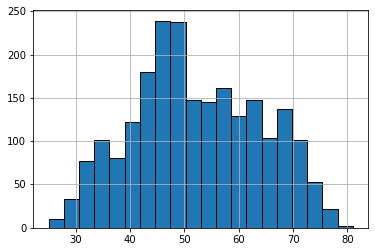

In [44]:
print(df_treat['Age'].min())
print(df_treat['Age'].max())

df_treat['Age'].hist(bins=20,edgecolor='black')

In [45]:
# Function to return age ranges
def rangeAge(age):
    age_class = ''
    if age <= 30:
        age_class = '< 30'
    elif age >= 31 and age <= 40:
        age_class = '31 - 40'
    elif age >= 41 and age <= 50:
        age_class = '41 - 50'
    elif age >= 51 and age <= 60:
        age_class = '51 - 60'
    elif age >= 61 and age <= 70:
        age_class = '61 - 70'
    else:
        age_class = '> 70'
        
    return age_class

In [46]:
df_treat['AgeClass'] = df_treat['Age'].apply(lambda x: rangeAge(x))

In [47]:
df_treat[['Age','AcceptanceScore','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].head()

,Age,AcceptanceScore,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,64,1,0,0,0,0,0,1
1,67,0,0,0,0,0,0,0
2,56,0,0,0,0,0,0,0
3,37,0,0,0,0,0,0,0
4,40,0,0,0,0,0,0,0


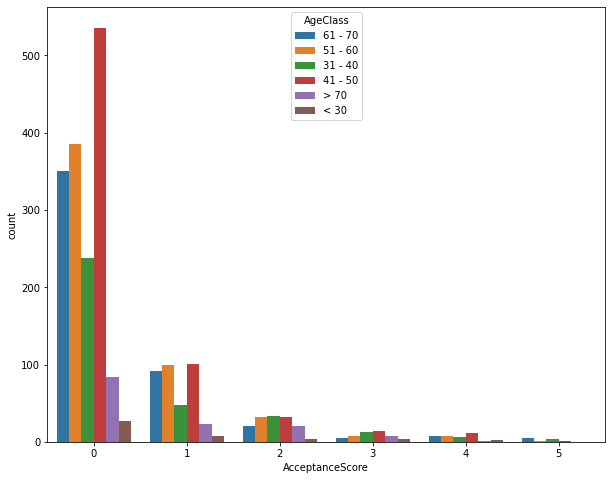

In [48]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(x="AcceptanceScore", hue='AgeClass', data=df_treat)

In [49]:
#Count IDs per class
df_test = pd.DataFrame(df_treat.groupby(['AgeClass','AcceptanceScore'])['ID'].agg('count'))

df_test = df_test.reset_index(col_level=1).pivot(index="AgeClass", columns="AcceptanceScore", values="ID")
df_test

AcceptanceScore,0,1,2,3,4,5
AgeClass,,,,,,
31 - 40,238.0,47.0,34.0,13.0,6.0,3.0
41 - 50,536.0,101.0,32.0,14.0,12.0,1.0
51 - 60,386.0,99.0,32.0,8.0,8.0,1.0
61 - 70,350.0,92.0,21.0,5.0,7.0,5.0
< 30,27.0,7.0,3.0,4.0,2.0,NaN
> 70,84.0,23.0,20.0,7.0,1.0,NaN


<AxesSubplot:xlabel='AcceptanceScore', ylabel='AgeClass'>

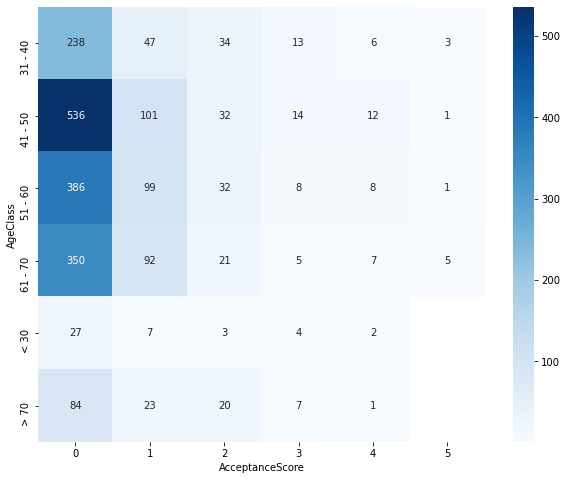

In [50]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_test, annot=True,cmap='Blues', fmt='g')

I can see from the chart that customers with 41 years old or more are the ones who accepted at least one campaign. 
We can also see that customers under 30 didn't accept 5 campaigns while customers between 61 and 70 years old are most likely to accept 5 campaigns.

**As I know that older people are most likely to accept campaigns I want to jnow if these customer are also the ones with higher TPV. Let's check it:***

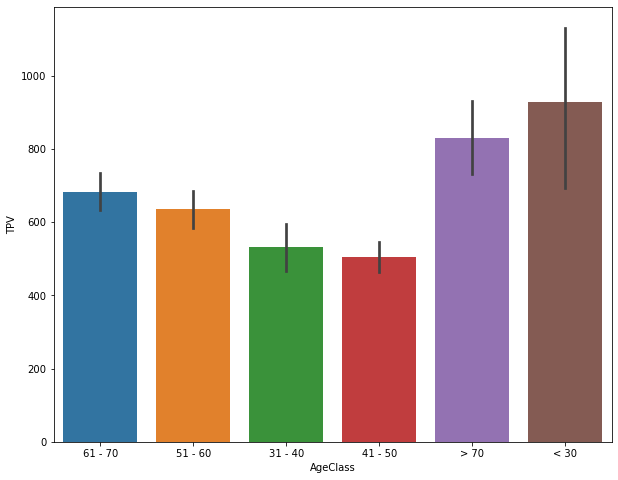

In [51]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x="AgeClass", y='TPV', data=df_treat)

I can see from the chart of TPV that althought customers between 61-70 years old accept more campaigns, younger customers (under 30) have the higher average TPV in the last 2 years. So despite older customers accept more campaings, the youngest spend more money buying products.

### H2: *Marital status* can evaluate the campaign acceptance. Married customers accept more campaigns.

In [179]:
#Count IDs per marital status
df_test = pd.DataFrame(df_treat.groupby(['Marital_Status','AcceptanceScore'])['ID'].agg('count'))

df_test = df_test.reset_index(col_level=1).pivot(index="Marital_Status", columns="AcceptanceScore", values="ID")
#df_test

<AxesSubplot:xlabel='AcceptanceScore', ylabel='Marital_Status'>

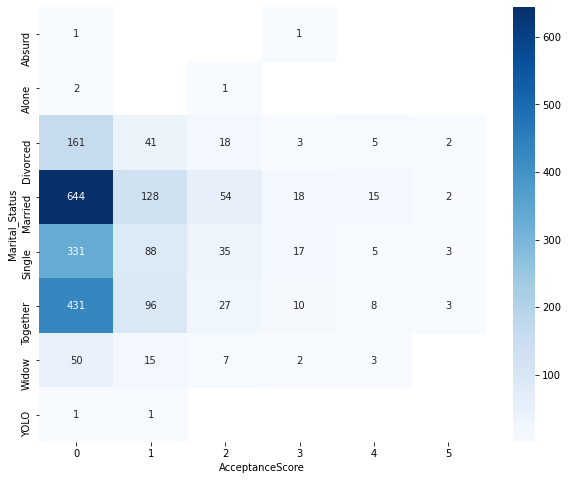

In [180]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_test, annot=True,cmap='Blues', fmt='g')

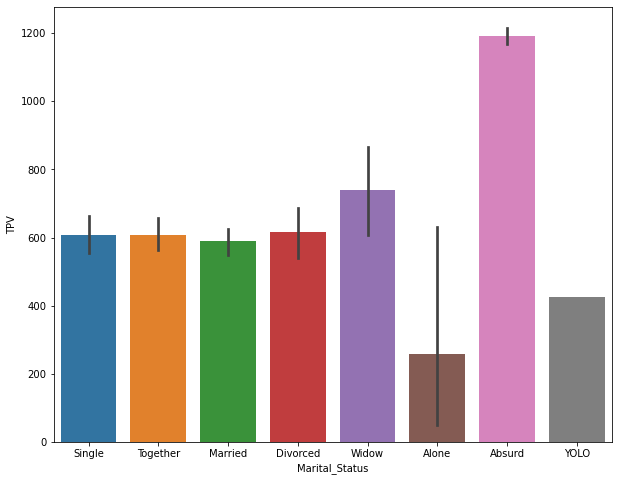

In [181]:
#Checking TPV for customers marital status
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x="Marital_Status", y='TPV', data=df_treat)


I can see from the heatmap that married customers are most likely to accept more campaigns, but the average TPV for the past 2 years loses for Absurd, Widow, Divorced, Together and Single customers.
It seems that customers with marital status *Together* and *Single* are some good targets once they have almost the same average TPV and also have a good acceptance score for the campaigns.

### H3: Customers with better recency are most likely to accept a campaign.

0
99


<AxesSubplot:>

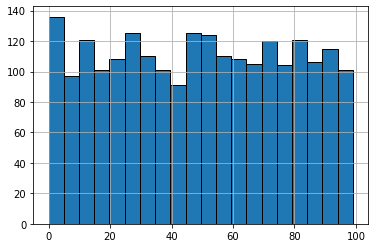

In [199]:
print(df_treat['Recency'].min())
print(df_treat['Recency'].max())

df_treat['Recency'].hist(bins=20,edgecolor='black')

In [203]:
# Function to return recency ranges
def recencyRange(days):
    recency_class = ''
    if days <= 30:
        recency_class = '< 30 days'
    elif days >= 31 and days <= 60:
        recency_class = '31 - 60 days'
    elif days >= 61 and days <= 90:
        recency_class = '61 - 90 days'
    else:
        recency_class = '> 90 days'
        
    return recency_class

In [204]:
df_treat['RecencyClass'] = df_treat['Recency'].apply(lambda x: recencyRange(x))

In [206]:
#df_treat['RecencyClass']

In [207]:
#Count IDs per marital status
df_test = pd.DataFrame(df_treat.groupby(['RecencyClass','AcceptanceScore'])['ID'].agg('count'))

df_test = df_test.reset_index(col_level=1).pivot(index="RecencyClass", columns="AcceptanceScore", values="ID")
#df_test

<AxesSubplot:xlabel='AcceptanceScore', ylabel='RecencyClass'>

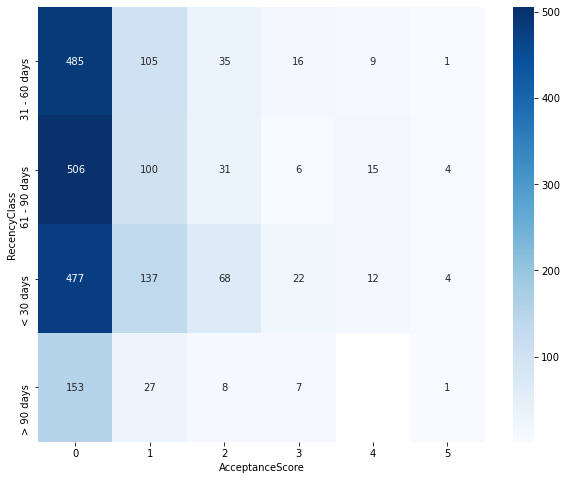

In [208]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_test, annot=True,cmap='Blues', fmt='g')

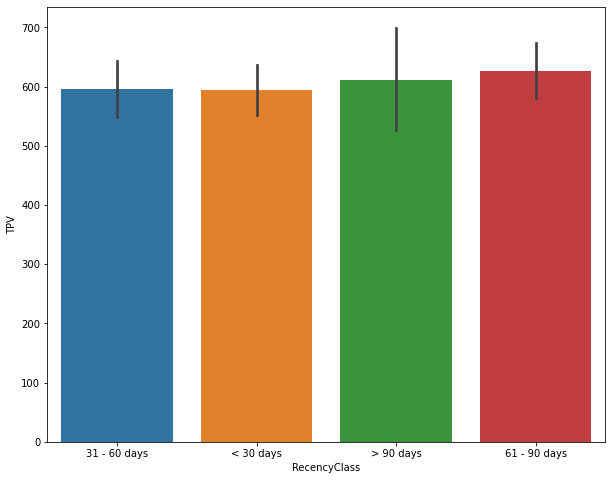

In [209]:
#Checking TPV for customers recency
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x="RecencyClass", y='TPV', data=df_treat)

The heatmap shows that customers with lower recency ( < 30 days since last purchase) are most likely to accept one, two or three campaigns. Also, customers with recency above 90 days are not good targets to accept campaings.

It looks like customers with 31 and 60 days since last purchase are also a good targer since they keep a good acceptance score until 3 campaigns. They also have the higher TPV for the last 2 years which means that they are also financially interesting.

# Export data

In [210]:
#
df_treat.to_csv('../data/clustering_db.csv', index=False)